In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

First, we import the datasets of the unique sequences. 

In [20]:
# Affinnity 
affinity_seq = pd.read_csv(r'C:\Users\monts\Documents\GitHub\PPI-Project\database_processing\Outputs\unique_affinity_seq.csv')

# Binary
binary_seq = pd.read_csv(r'C:\Users\monts\Downloads\unique_seq_Binary_C.csv')


We see how many unique sequences each dataset has.

In [21]:
# Affinity unique sequences
affinity_seq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4072 entries, 0 to 4071
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   protein_seq  4072 non-null   object
 1   id           4072 non-null   object
dtypes: object(2)
memory usage: 63.8+ KB


In [22]:
# Binary unique sequences
binary_seq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37351 entries, 0 to 37350
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id_seq       37351 non-null  object
 1   protein_seq  37351 non-null  object
dtypes: object(2)
memory usage: 583.7+ KB


Now we see the length distribution of the protein sequences with a graph for each dataset. 

In [23]:
# Get a list with the protein length and then a dataframe with just the lengths

length_affinity = []

for i in range(0,len(affinity_seq)):
    s = affinity_seq['protein_seq'][i]
    length_affinity.append(len(s))

df_length_aff = pd.DataFrame(length_affinity)
df_length_aff.columns =['length']

df_length_aff.describe()


,length
count,4072.000000
mean,169.703585
std,137.718693
min,9.000000
25%,71.000000
50%,134.000000
75%,209.250000
max,1004.000000


In [24]:
# For the binary dataset we do the same
length_binary = []

for i in range(0,len(binary_seq)):
    l = binary_seq['protein_seq'][i]
    length_binary.append(len(l))

df_length_bin = pd.DataFrame(length_binary)
df_length_bin.columns =['length']

df_length_bin.describe()

,length
count,37351.000000
mean,434.150545
std,232.798716
min,5.000000
25%,249.000000
50%,398.000000
75%,586.000000
max,1024.000000


Having the length of each sequence, we make graphs of their distribution.

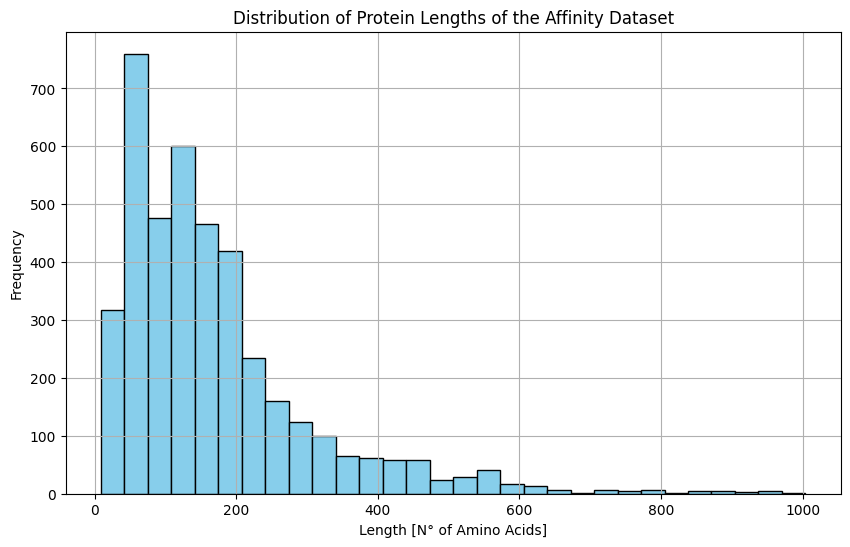

In [25]:
# Plot the distribution of protein lengths
plt.figure(figsize=(10, 6))
plt.hist(df_length_aff['length'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Protein Lengths of the Affinity Dataset')
plt.xlabel('Length [N° of Amino Acids]')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The same data but in a logarithm scale graph. 

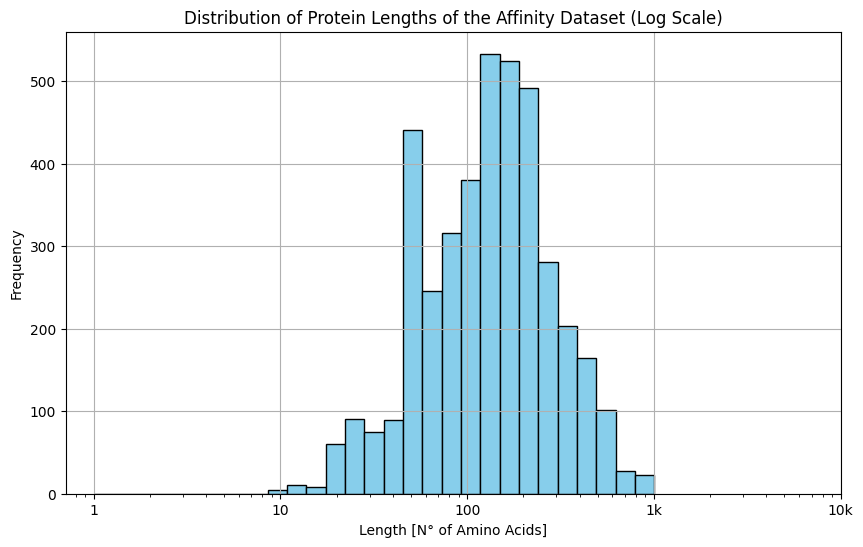

In [26]:
# Define bins for logarithmic scale
log_bins = np.logspace(0, np.log10(df_length_aff['length'].max()), 30)

# Plot the distribution of protein lengths on a logarithmic scale
plt.figure(figsize=(10, 6))
plt.hist(df_length_aff['length'], bins=log_bins, color='skyblue', edgecolor='black')
plt.xscale('log')
plt.title('Distribution of Protein Lengths of the Affinity Dataset (Log Scale)')
plt.xlabel('Length [N° of Amino Acids]')
plt.ylabel('Frequency')

# Define custom x-axis ticks
xticks = [1, 10, 100, 1000, 10000]
xtick_labels = ['1', '10', '100', '1k', '10k']
plt.xticks(xticks, xtick_labels)

plt.grid(True)
plt.show()

Now for the binary dataset. 

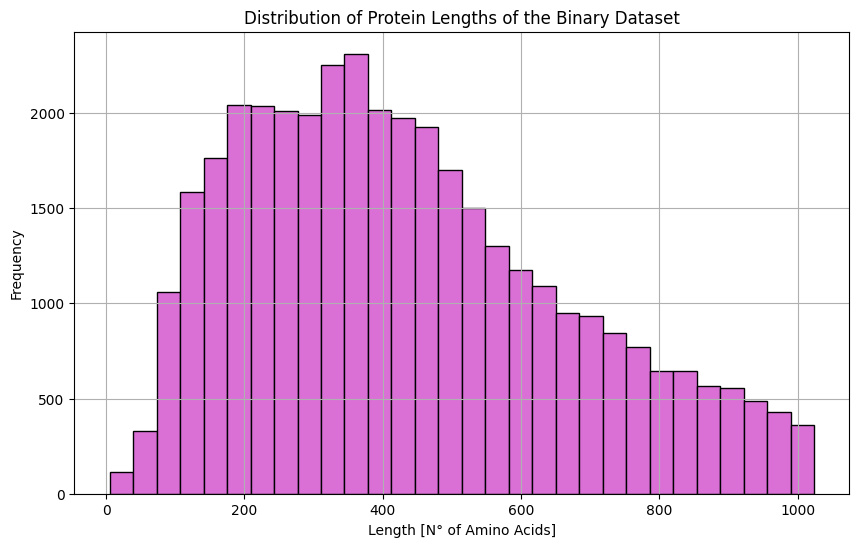

In [27]:
# Plot the distribution of protein lengths
plt.figure(figsize=(10, 6))
plt.hist(df_length_bin['length'], bins=30, color='orchid', edgecolor='black')
plt.title('Distribution of Protein Lengths of the Binary Dataset')
plt.xlabel('Length [N° of Amino Acids]')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

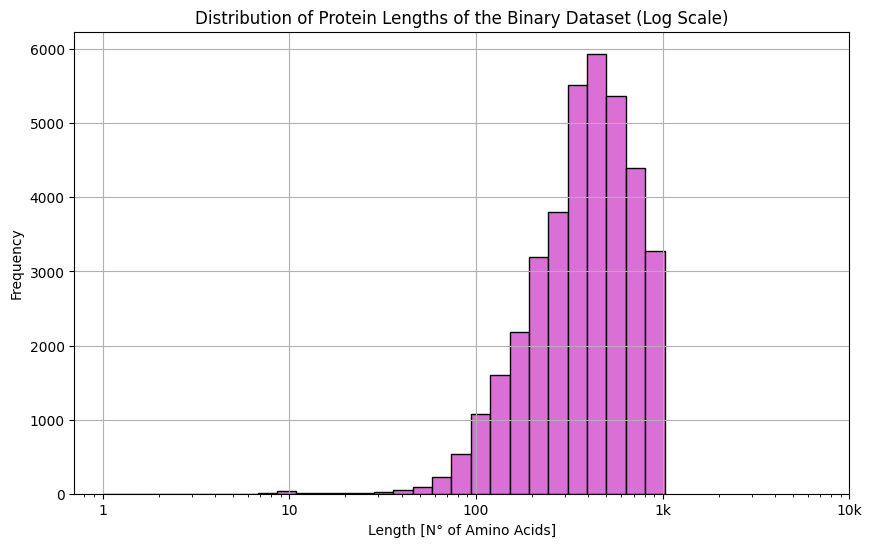

In [28]:
# Define bins for logarithmic scale
log_bins = np.logspace(0, np.log10(df_length_bin['length'].max()), 30)

# Plot the distribution of protein lengths on a logarithmic scale
plt.figure(figsize=(10, 6))
plt.hist(df_length_bin['length'], bins=log_bins, color='orchid', edgecolor='black')
plt.xscale('log')
plt.title('Distribution of Protein Lengths of the Binary Dataset (Log Scale)')
plt.xlabel('Length [N° of Amino Acids]')
plt.ylabel('Frequency')

# Define custom x-axis ticks
xticks = [1, 10, 100, 1000, 10000]
xtick_labels = ['1', '10', '100', '1k', '10k']
plt.xticks(xticks, xtick_labels)

plt.grid(True)
plt.show()

Additionally, for the Affinity dataset, we can plot the distribution of the dissociation constant. For that, we must first upload the dataset.

In [29]:
affinity_ds = pd.read_csv(r'C:\Users\monts\Documents\GitHub\PPI-Project\database_processing\Outputs\Affinity_database_C.csv')


In [30]:
affinity_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Entry          3424 non-null   int64  
 1   PDB_id         3424 non-null   object 
 2   protein_1_seq  3424 non-null   object 
 3   protein_2_seq  3424 non-null   object 
 4   Kd [M]         3424 non-null   float64
 5   Is mutant?     3424 non-null   bool   
 6   Database       3424 non-null   object 
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 164.0+ KB


We describe the dissociation constant column. 

In [31]:
affinity_kd = affinity_ds.filter(items=['Kd [M]'])
affinity_kd.describe()

,Kd [M]
count,3.424000e+03
mean,4.648862e-04
std,1.653012e-02
min,2.000000e-16
25%,9.090000e-10
50%,8.095000e-08
75%,2.800000e-06
max,9.300000e-01


Now, we plot the distribution of $K_D$ in logarithm scale.

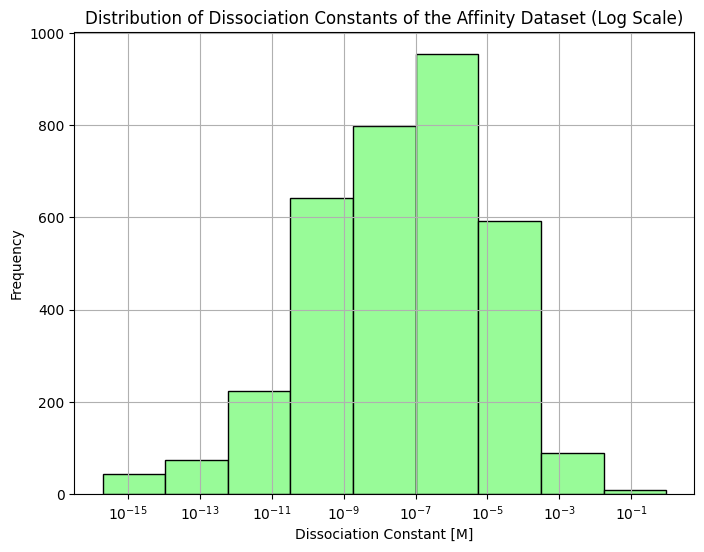

In [32]:
# Plot the distribution of Kd
plt.figure(figsize=(8, 6))
plt.hist(affinity_kd['Kd [M]'], bins=np.logspace(np.log10(affinity_kd['Kd [M]'].min()), np.log10(affinity_kd['Kd [M]'].max()), 10), color='palegreen', edgecolor='black')
plt.xscale('log')  # Set x-axis scale to logarithmic
plt.title('Distribution of Dissociation Constants of the Affinity Dataset (Log Scale)')
plt.xlabel('Dissociation Constant [M]')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Lastly, we check the number of total interactions in the binary dataset. 

In [34]:
binary_ds = pd.read_csv(r'C:\Users\monts\Downloads\Binary_database_C.csv')
binary_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629444 entries, 0 to 629443
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id_1         629444 non-null  object
 1   seq_1        629444 non-null  object
 2   id_2         629444 non-null  object
 3   seq_2        629444 non-null  object
 4   dataset      629444 non-null  object
 5   Interaccion  629444 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 28.8+ MB


We count the negative and positive interactions. 

In [41]:
count_neg = binary_ds['Interaccion'].value_counts()[0]
print(count_neg)

1965


In [43]:
count_pos = binary_ds['Interaccion'].value_counts()[1]
print(count_pos)

627479


The binary dataset has 1965 non-interacting protein pairs, and has 627479 positive PP interactions.